<a href="https://colab.research.google.com/github/anbguye/tumor-identifier-ai/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:01<00:00, 101MB/s]
100% 149M/149M [00:01<00:00, 98.4MB/s]


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  #ITerate through dirs in training path
  for label in os.listdir(path):
    label_path = os.path.join(path,label)

    #Checks if a dir
    if os.path.isdir(label_path):
      #Iterate through imgs in label dir
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        #Add class and pathj to respective lists
        classes.append(label)
        class_paths.append(image_path)

  #Create a dataframe with collected data
  df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})

  return df

In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_0358.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0781.jpg,meningioma
2,/content/Training/meningioma/Tr-me_1261.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0195.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0495.jpg,meningioma
...,...,...
5707,/content/Training/notumor/Tr-no_0019.jpg,notumor
5708,/content/Training/notumor/Tr-no_0635.jpg,notumor
5709,/content/Training/notumor/Tr-no_1126.jpg,notumor
5710,/content/Training/notumor/Tr-no_0897.jpg,notumor


In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/meningioma/Te-me_0132.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0054.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0182.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0235.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0241.jpg,meningioma
...,...,...
1306,/content/Testing/notumor/Te-no_0082.jpg,notumor
1307,/content/Testing/notumor/Te-no_0346.jpg,notumor
1308,/content/Testing/notumor/Te-no_0039.jpg,notumor
1309,/content/Testing/notumor/Te-no_0270.jpg,notumor


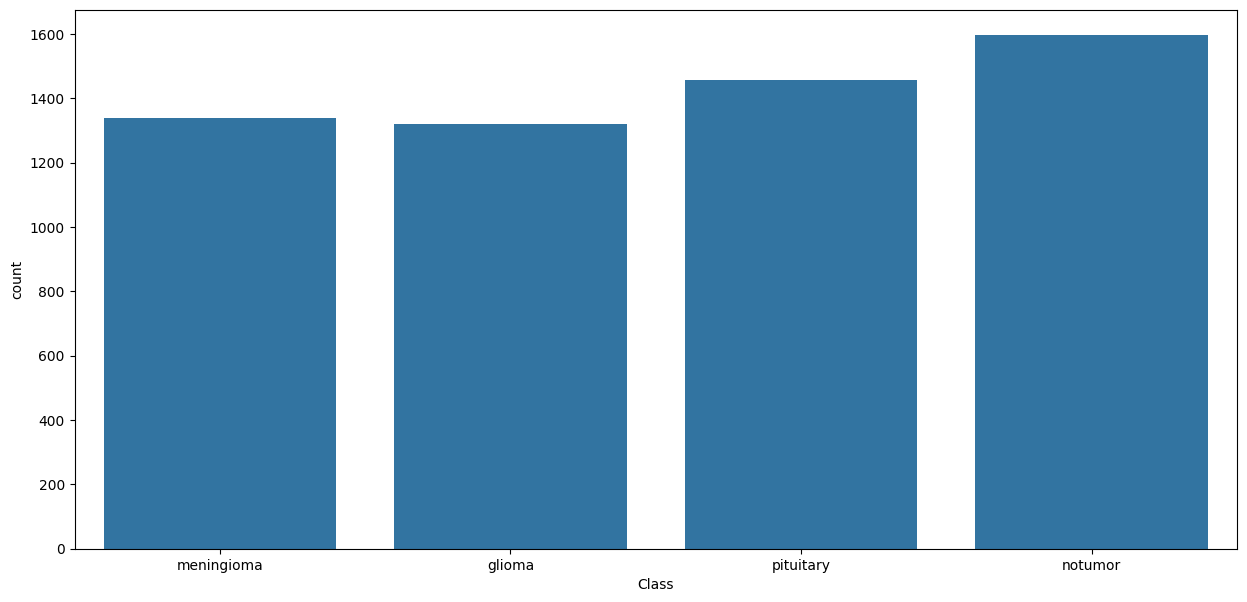

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df,x=tr_df['Class'])

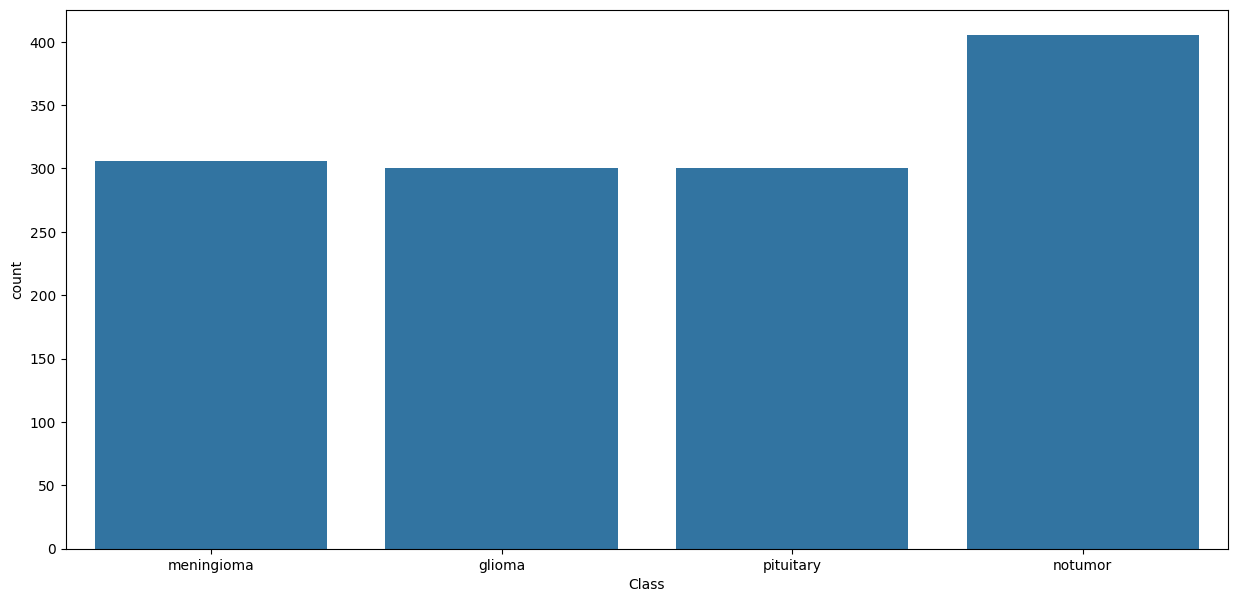

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df,x=ts_df['Class'])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
750,/content/Testing/pituitary/Te-pi_0095.jpg,pituitary
656,/content/Testing/pituitary/Te-piTr_0003.jpg,pituitary
673,/content/Testing/pituitary/Te-pi_0171.jpg,pituitary
696,/content/Testing/pituitary/Te-pi_0248.jpg,pituitary
26,/content/Testing/meningioma/Te-me_0022.jpg,meningioma
...,...,...
1229,/content/Testing/notumor/Te-no_0194.jpg,notumor
603,/content/Testing/glioma/Te-gl_0133.jpg,glioma
746,/content/Testing/pituitary/Te-pi_0226.jpg,pituitary
1256,/content/Testing/notumor/Te-no_0300.jpg,notumor


In [13]:
ts_df

,Class Path,Class
138,/content/Testing/meningioma/Te-me_0066.jpg,meningioma
54,/content/Testing/meningioma/Te-me_0155.jpg,meningioma
1115,/content/Testing/notumor/Te-no_0324.jpg,notumor
1122,/content/Testing/notumor/Te-no_0175.jpg,notumor
1296,/content/Testing/notumor/Te-no_0373.jpg,notumor
...,...,...
1234,/content/Testing/notumor/Te-no_0111.jpg,notumor
93,/content/Testing/meningioma/Te-me_0179.jpg,meningioma
195,/content/Testing/meningioma/Te-me_0114.jpg,meningioma
784,/content/Testing/pituitary/Te-pi_0273.jpg,pituitary


In [14]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


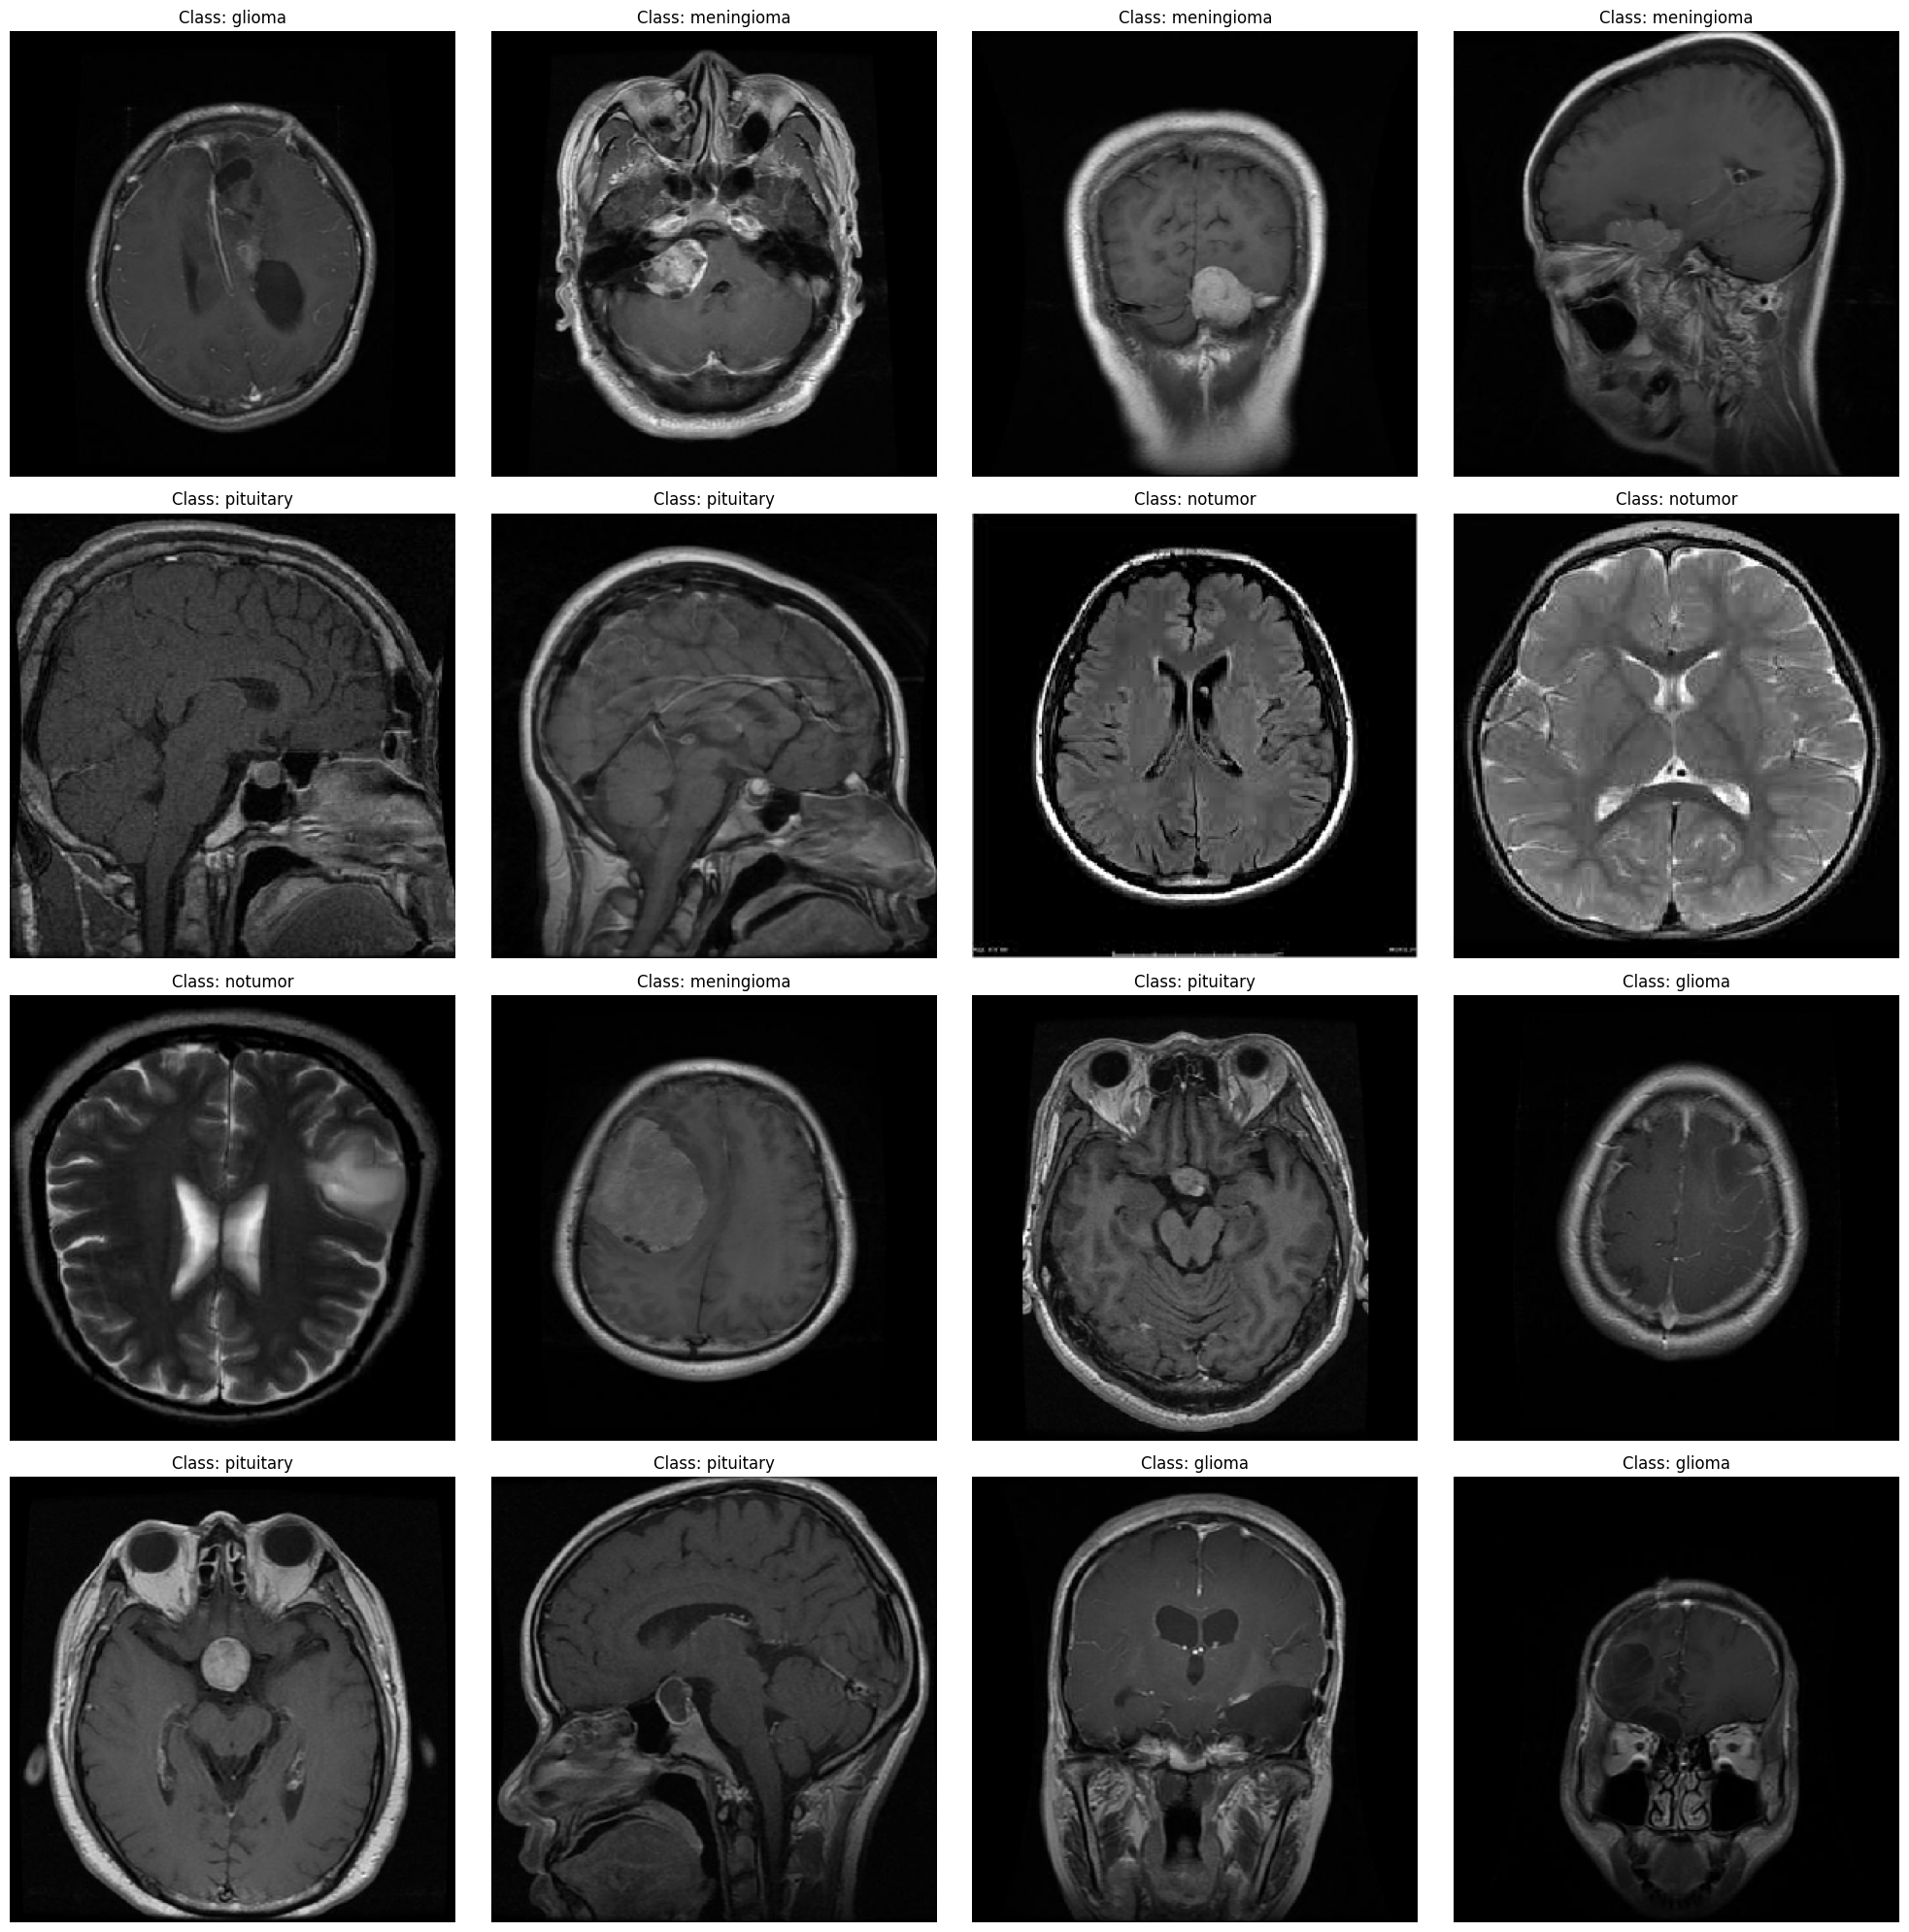

In [16]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  #gets class index
  class_index = np.argmax(label)

  #gets list of class names and class indicies
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  #find index of class_index in list of indicies
  index_position = class_indices.index(class_index)

  #gets class name using index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
img_shape=(299,299,3)

base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",input_shape=img_shape,pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4,activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision(),Recall()
])

In [19]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.7160 - loss: 0.8223 - precision: 0.7988 - recall: 0.5933 - val_accuracy: 0.8656 - val_loss: 0.3200 - val_precision: 0.8768 - val_recall: 0.8580
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 814ms/step - accuracy: 0.9661 - loss: 0.1013 - precision: 0.9670 - recall: 0.9642 - val_accuracy: 0.9603 - val_loss: 0.1138 - val_precision: 0.9632 - val_recall: 0.9588
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 811ms/step - accuracy: 0.9901 - loss: 0.0329 - precision: 0.9905 - recall: 0.9897 - val_accuracy: 0.9527 - val_loss: 0.1228 - val_precision: 0.9599 - val_recall: 0.9511
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 814ms/step - accuracy: 0.9926 - loss: 0.0292 - precision: 0.9928 - recall: 0.9926 - val_accuracy: 0.9802 - val_loss: 0.0687 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 810ms/step - accuracy: 0.9963 - loss: 0.0201 - precision: 0.9965 - recall: 0.9961 - val_accuracy: 0.9939 - val_loss: 

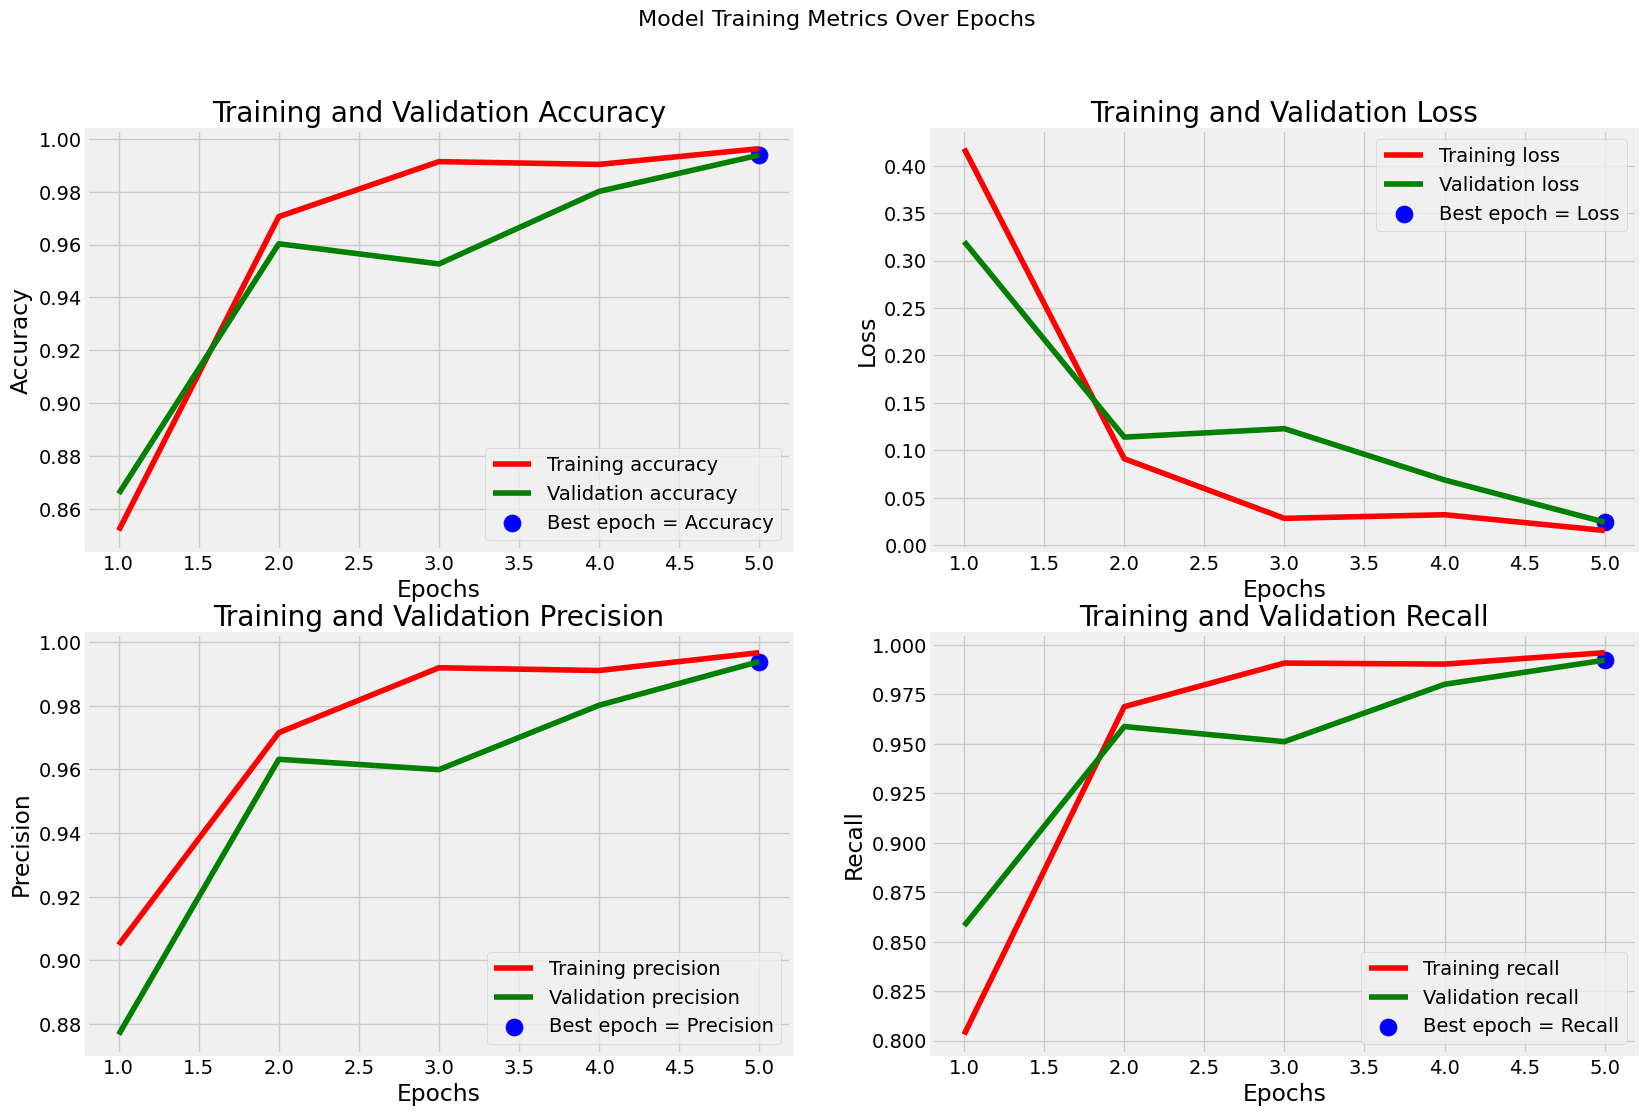

In [20]:
#get training and validation metrics from history
metrics = ['accuracy', 'loss','precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#find best epochs and values
best_epochs={}
best_values={}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
     idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {metric.title()}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()



In [21]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 245ms/step - accuracy: 0.9995 - loss: 0.0013 - precision: 0.9995 - recall: 0.9995
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.9962 - loss: 0.0136 - precision: 0.9962 - recall: 0.9962
 1/41 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - accuracy: 1.0000 - loss: 5.8978e-04 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9943 - loss: 0.0137 - precision: 0.9943 - recall: 0.9943
Train Accuracy: 99.96%
Train Loss: 0.0012


Validation Accuracy: 99.24
Validation Loss: 0.0258


Test Accuracy: 99.24%
Test Loss: 0.0177


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step


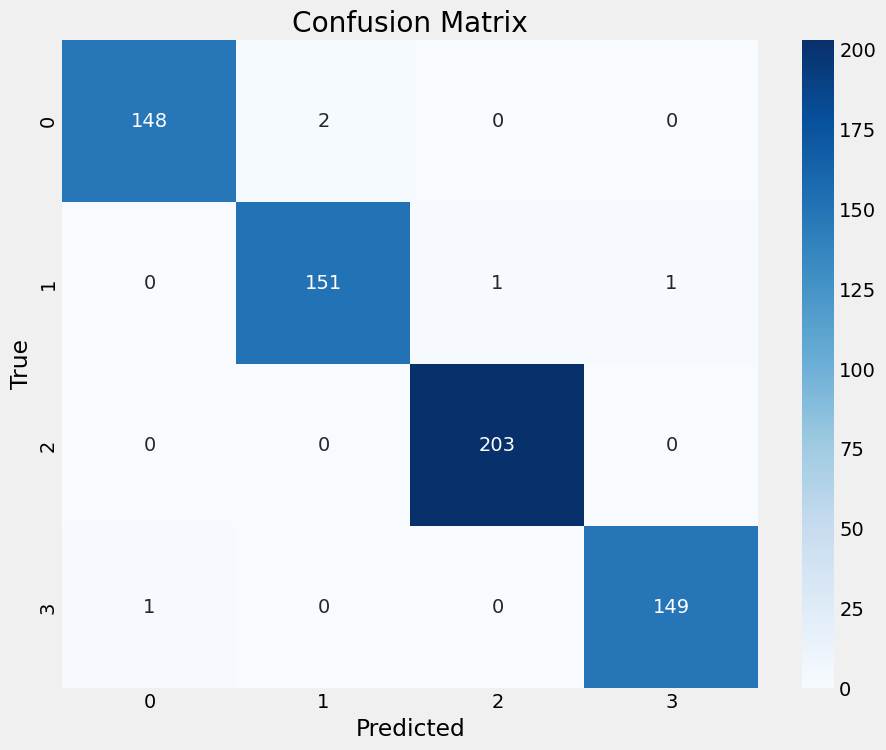

In [22]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [64]:
from PIL import Image

def predict (img_path: str) -> None:
  #get class labels
  labels = list(class_dict.keys())

  #create figure
  plt.figure(figsize=(6,8))

  #load and preproccess imgs
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  #get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  #get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  #plot original img
  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  #plot prediction probabilties
  plt.subplot(2,1,2)
  bars = plt.barh(labels,probabilities)
  plt.xlabel('Probability', fontsize=15)
  plt.title("Class Probabilities")

  #add probability
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


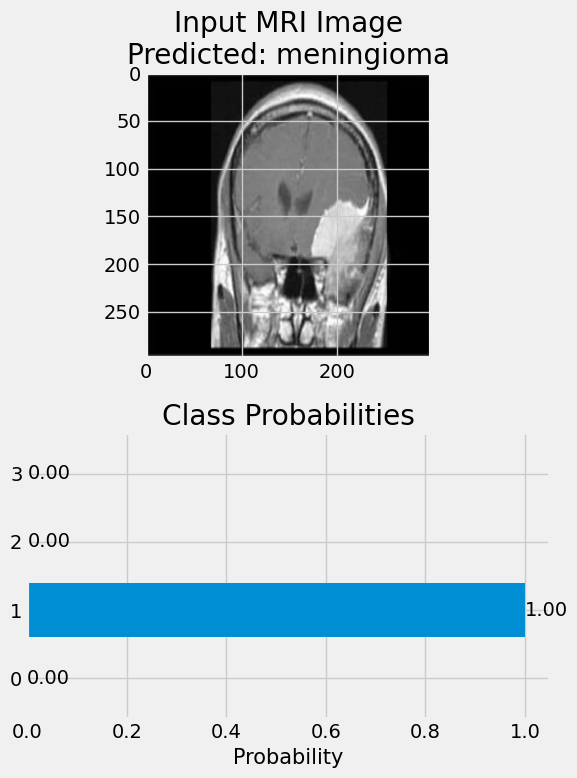


Predicted tumor type: meningioma


In [24]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


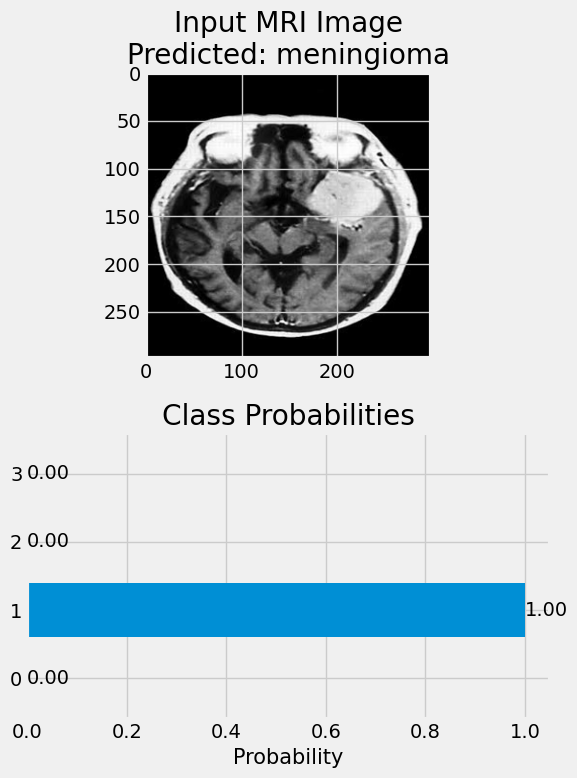


Predicted tumor type: meningioma


In [25]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


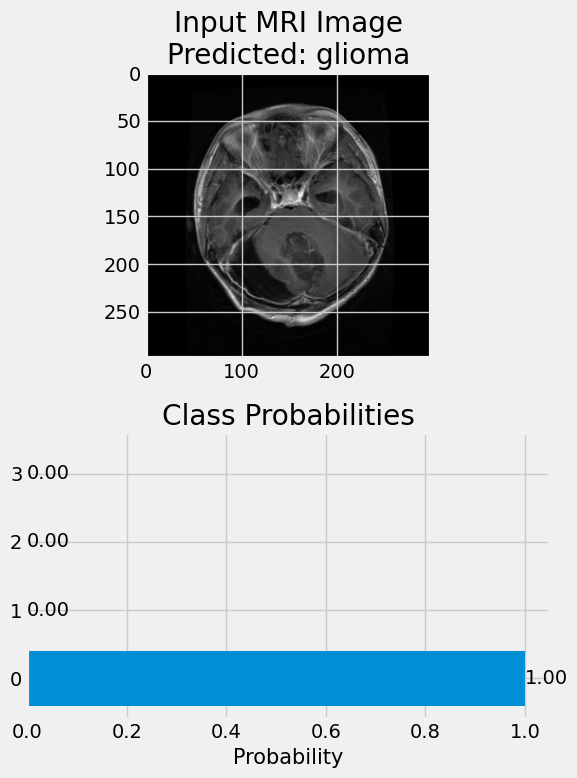


Predicted tumor type: glioma


In [26]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [27]:
model.save_weights("xception_model.weights.h5")

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [29]:
batch_size = 16

img_size = (224,224)

image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [30]:
#create sequential model

cnn_model = Sequential()

#convolutional layers
cnn_model.add(Conv2D(512, (3,3), padding='same', input_shape=(224,224,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#flatten output for fully connected layers
cnn_model.add(Flatten())

#fully connected layers
cnn_model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4,activation='softmax')) #output layer with 4 neurons for 4 classes

#compile model
cnn_model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision(),Recall()
])

#display model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,841,412 (18.47 MB)

 Trainable params: 4,841,412 (18.47 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 148s 342ms/step - accuracy: 0.5270 - loss: 1.4923 - precision_1: 0.6324 - recall_1: 0.3222 - val_accuracy: 0.7298 - val_loss: 0.9605 - val_precision_1: 0.7950 - val_recall_1: 0.6336
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 294ms/step - accuracy: 0.7700 - loss: 0.8359 - precision_1: 0.8082 - recall_1: 0.7263 - val_accuracy: 0.7847 - val_loss: 0.7834 - val_precision_1: 0.8068 - val_recall_1: 0.7267
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 103s 287ms/step - accuracy: 0.8188 - loss: 0.6929 - precision_1: 0.8350 - recall_1: 0.7897 - val_accuracy: 0.7878 - val_loss: 0.6868 - val_precision_1: 0.8058 - val_recall_1: 0.7664
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 103s 288ms/step - accuracy: 0.8607 - loss: 0.5712 - precision_1: 0.8757 - recall_1: 0.8426 - val_accuracy: 0.8580 - val_loss: 0.5547 - val_precision_1: 0.8752 - val_recall_1: 0.8351
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 287ms/step - accuracy: 0.8995 - loss: 0.4577 - precision_1: 0.9089 - recall_1: 0.8

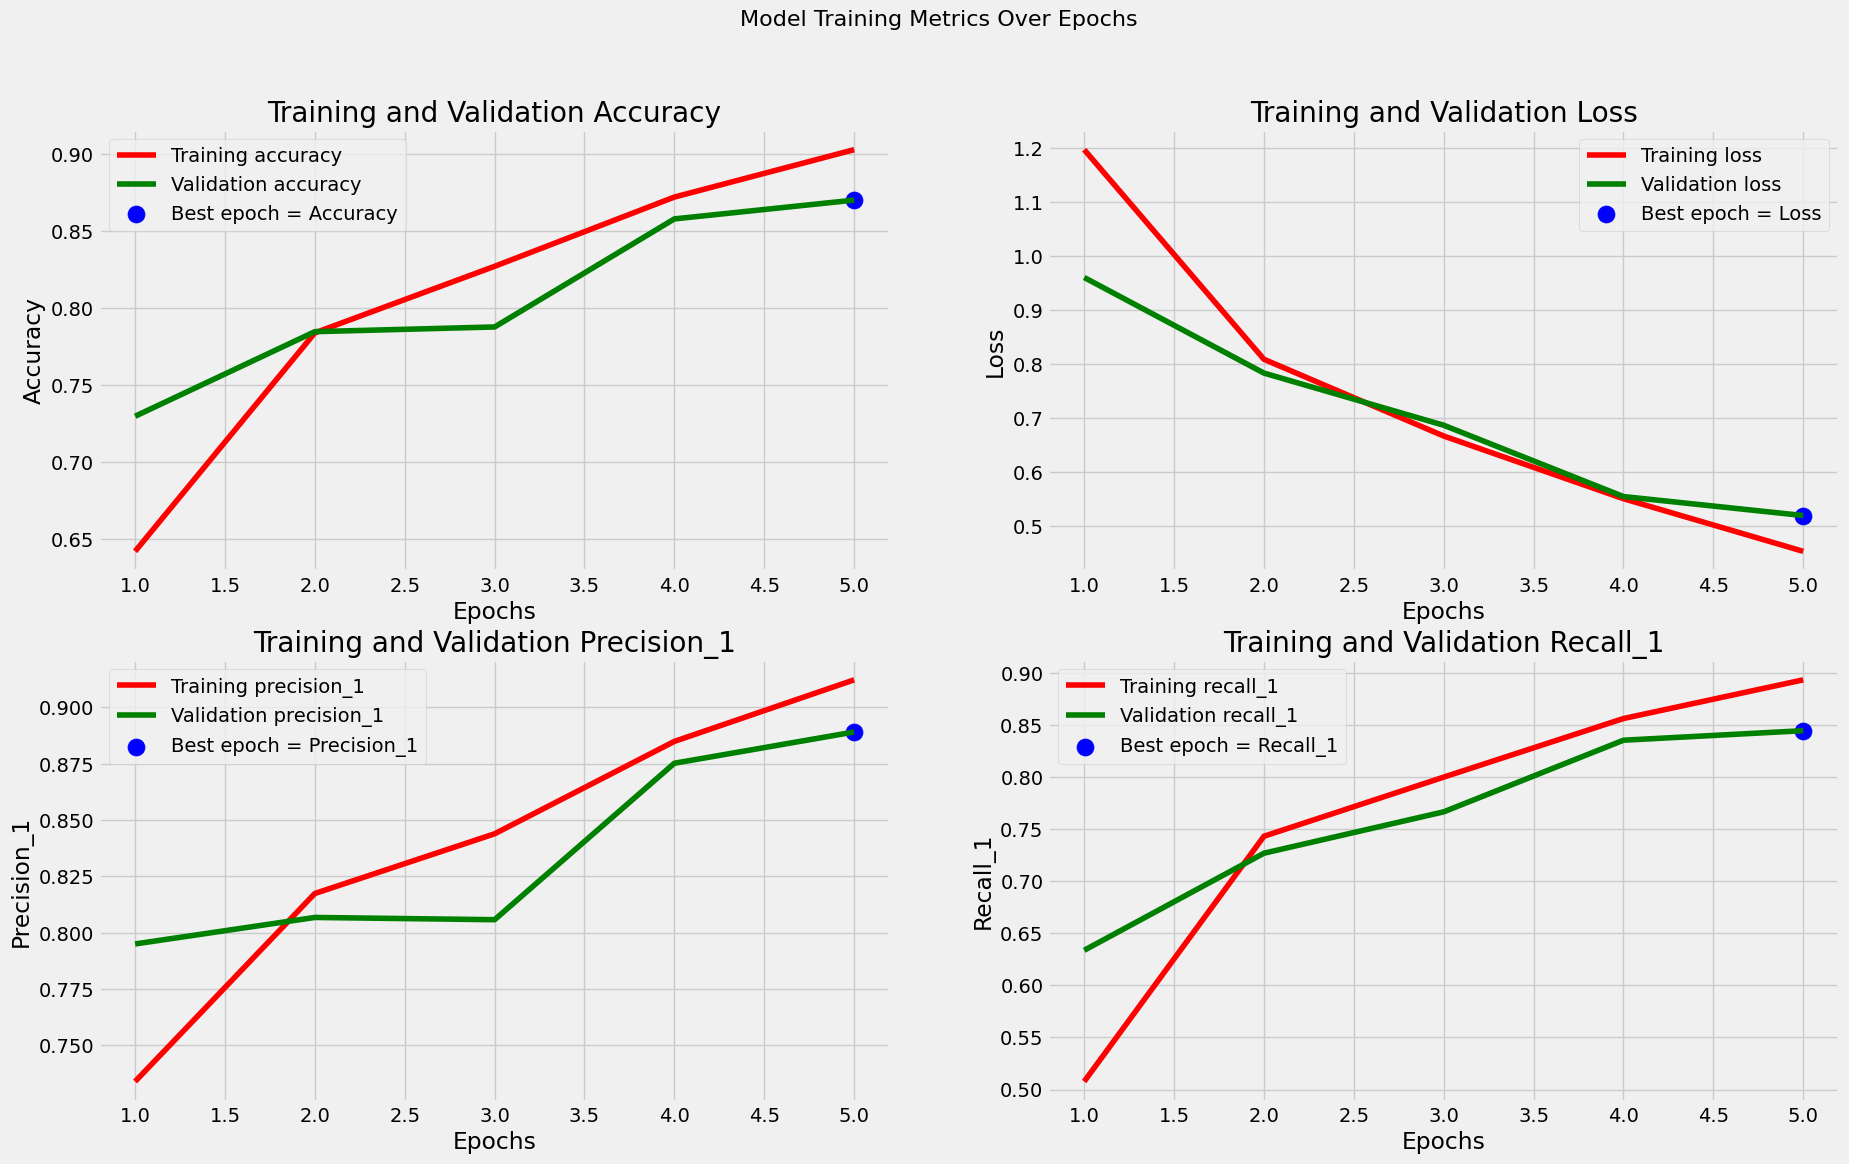

In [32]:
#get training and validation metrics from history
metrics = ['accuracy', 'loss','precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

#find best epochs and values
best_epochs={}
best_values={}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
     idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {metric.title()}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()



In [33]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9266 - loss: 0.3965 - precision_1: 0.9392 - recall_1: 0.9152
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8814 - loss: 0.4985 - precision_1: 0.9025 - recall_1: 0.8641
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8750 - loss: 0.5702 - precision_1: 0.8750 - recall_1: 0.8750 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8411 - loss: 0.5654 - precision_1: 0.8528 - recall_1: 0.8301
Train Accuracy: 93.01%
Train Loss: 0.3946


Validation Accuracy: 87.63
Validation Loss: 0.5123


Test Accuracy: 83.54%
Test Loss: 0.5886


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


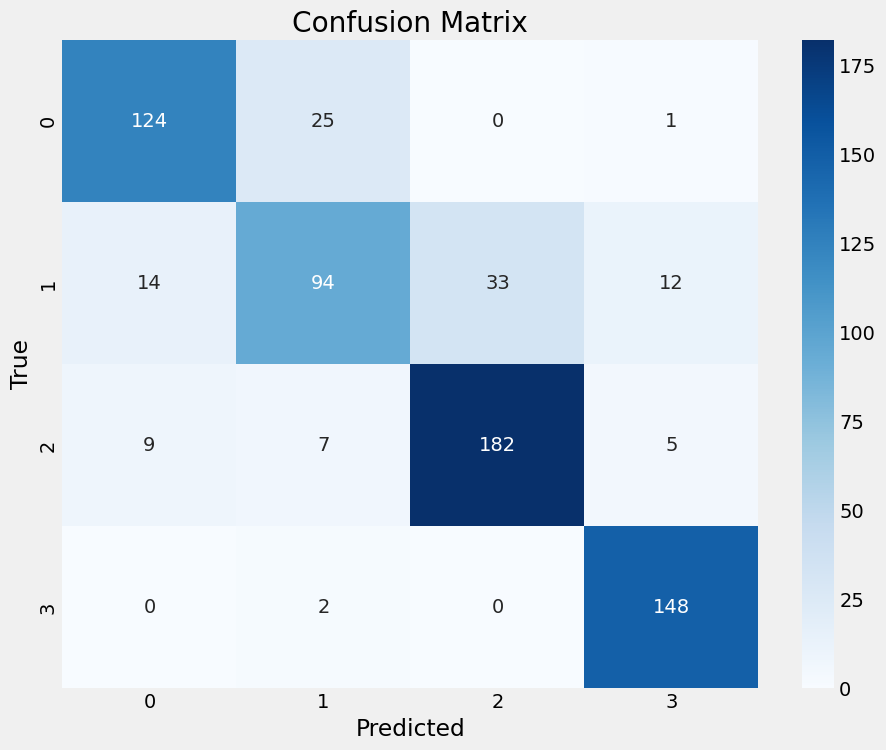

In [34]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       150
           1       0.73      0.61      0.67       153
           2       0.85      0.90      0.87       203
           3       0.89      0.99      0.94       150

    accuracy                           0.84       656
   macro avg       0.83      0.83      0.83       656
weighted avg       0.83      0.84      0.83       656



In [36]:
cnn_model.save("cnn_model.h5")

PART 2: STREAMLIT WEB APP

In [84]:
!pip install streamlit pyngrok python-dotenv

In [85]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [86]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [87]:
def run_streamlit():
  os.system('streamlit run /content/app.py --server.port 8501')

In [88]:
from urllib.request import ProxyBasicAuthHandler
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

def generate_explaination(img_path, model_prediction, confidence):
  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model taht was trained to classify brain tumors
  as either glioma, meningioma, pituitary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your response:
  - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in
  light cyan, those are the regions where the model is focusing on.
  - Explain possible reasons why the model made the prediction it did.
  - Dont mention anything like 'The saliency map highlights the regions the model is focusing on, which is in light cyan'
  in your explaination.
  - Keep your explaination to 4 sentences max.

  Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt,img])

  return response.text

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients,axis=-1)
  gradients = gradients.numpy().squeeze()

  #resize gradients to match orig img size
  gradients = cv2.resize(gradients,img_size)

  #create circular mask for brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) -10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y- center[1])**2 <= radius**2

  #apply mask to gradients
  gradients = gradients * mask

  #normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  #apply a higher threshold
  threshold = np.percentile(gradients[mask],80)
  gradients[gradients < threshold] = 0

  #apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11,11),0)

  #create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255*gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  #resize heatmap to match original img size
  heatmap = cv2.resize(heatmap, img_size)

  #superimpose heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # save saliency map
  cv2.imwrite(saliency_map_path,cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img

def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model= tf.keras.applications.Xception(include_top=False,weights="imagenet",
                                             input_shape=img_shape,pooling='max')
  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128,activation='relu'),
      Dropout(rate=0.25),
      Dense(4,activation='softmax')
  ])

  model.build((None,) + img_shape)

  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy', Precision(), Recall()])
  model.load_weights(model_path)

  return model

st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg","jpeg","png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size=(299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size=(224,224)

  labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_container_width=True)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explaination = generate_explaination(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explaination")
  st.write(explaination)


2024-11-10 05:30:04.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 05:30:04.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 05:30:04.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 05:30:04.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 05:30:04.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 05:30:04.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 05:30:04.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 05:30:04.239 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [89]:
thread = Thread(target=run_streamlit)
thread.start()

In [91]:
public_url = ngrok.connect(addr='8501',proto='http',bind_tls=True)

print("Public URL:" , public_url)

Public URL: NgrokTunnel: "https://ddf9-34-106-199-206.ngrok-free.app" -> "http://localhost:8501"


Writing .env
